In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
%matplotlib inline

In [2]:
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_gcfp.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [3]:
df['Diag'].value_counts()

Neg                  30
Pos - Early Conv     12
Pos - Early Acute    12
Pos - Late           10
Name: Diag, dtype: int64

In [4]:
df.columns

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag'],
      dtype='object')

In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      64 non-null     object 
 1   P100    64 non-null     float64
 2   P41     64 non-null     float64
 3   OspC    64 non-null     float64
 4   DbpA    64 non-null     float64
 5   BmpA    64 non-null     float64
 6   DbpB    64 non-null     float64
 7   P45     64 non-null     float64
 8   P58     64 non-null     float64
 9   P66     64 non-null     float64
 10  VlsE    64 non-null     float64
 11  ErpL    64 non-null     float64
 12  OspD    64 non-null     float64
 13  Diag    64 non-null     object 
dtypes: float64(12), object(2)
memory usage: 7.1+ KB


In [6]:
feature_columns = ['P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45',
       'P58', 'P66', 'VlsE', 'ErpL', 'OspD']
X = df[feature_columns].values

X[0:5]

array([[ 1.98301668,  2.1761209 ,  5.88212057,  1.73861454,  1.79083071,
         3.95060049,  1.06541966,  1.93890358,  2.02107262, 12.45584216,
         1.07788947,  1.78438692],
       [ 0.99995049,  2.92070994,  0.82431779,  8.27945815,  5.25502377,
         3.92530155,  2.13792218,  9.25600905,  2.85953154,  9.86827322,
         1.63255897,  1.63950367],
       [ 1.30357268,  2.65369322,  1.48438828, 11.07250259,  2.45627099,
         9.74972207,  1.85122189,  3.66964123,  3.94502199, 11.61519582,
         2.02558011,  1.56863534],
       [ 0.95118843,  1.9174358 ,  1.39403148,  1.19700767,  1.41514323,
         2.35924062,  1.01217702,  1.32133611,  1.3724105 ,  4.37009458,
         0.99934068,  1.30889101],
       [ 1.11738255,  2.43659697,  2.28407202,  1.39707483,  1.37392648,
         1.93265429,  1.23326853,  1.51796498,  1.64828868, 10.35798884,
         1.23086668,  1.62281255]])

In [7]:
y = df["Diag"]
y[0:5]

0          Pos - Late
1          Pos - Late
2          Pos - Late
3    Pos - Early Conv
4    Pos - Early Conv
Name: Diag, dtype: object

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.05, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (60, 12) (60,)
Test set: (4, 12) (4,)


In [9]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [11]:
print (y_pred)
print (y_test)

['Neg' 'Neg' 'Neg' 'Neg']
29    Neg
60    Neg
31    Neg
61    Neg
Name: Diag, dtype: object


In [12]:
#Random Forest can report on feature importance to allow removal of predictors that 
#may just contribute noise to the model. 
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=feature_columns).sort_values(ascending=False)
feature_imp

VlsE    0.157460
DbpA    0.118538
OspC    0.095828
DbpB    0.091747
P58     0.090198
P66     0.082884
P41     0.080054
ErpL    0.067485
P45     0.063760
P100    0.054609
BmpA    0.054385
OspD    0.043053
dtype: float64

No handles with labels found to put in legend.


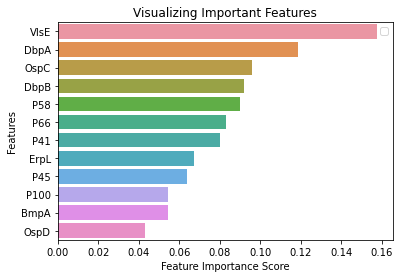

In [13]:
#create a bar chart of the feature importance as determined above
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [14]:
#use the "recursive feature elimination" technique in sklearn to pick 'n' 
#most important features
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
rfe = RFE(clf, n_features_to_select=7)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False  True False  True  True  True False False]
[4 1 1 1 5 1 2 1 1 1 3 6]


In [15]:
#use the information gathered above to trim a column
#of relevant feature names
data = {'feature_columns': feature_columns,'important': rfe.support_}
selection_df  = pd.DataFrame(data)
selection_df.drop(selection_df[selection_df['important'] == False].index, inplace = True)
selection_df

,feature_columns,important
1,P41,True
2,OspC,True
3,DbpA,True
5,DbpB,True
7,P58,True
8,P66,True
9,VlsE,True


In [16]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features(as chosen above) and labels
reduced_X=df[selection_df.feature_columns]  # Removed low importance (<.075) features
y=df['Diag']                                       
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( reduced_X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (51, 7) (51,)
Test set: (13, 7) (13,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
desired_estimators = X_train.shape[0] * 3
print(desired_estimators)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=desired_estimators)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

153
Accuracy: 0.6923076923076923


In [18]:
print(y_test)
print(y_pred)

52     Pos - Early Conv
58                  Neg
0            Pos - Late
44           Pos - Late
5     Pos - Early Acute
36    Pos - Early Acute
16                  Neg
12                  Neg
25                  Neg
61                  Neg
56                  Neg
9     Pos - Early Acute
40    Pos - Early Acute
Name: Diag, dtype: object
['Pos - Early Conv' 'Neg' 'Pos - Early Conv' 'Pos - Late'
 'Pos - Early Acute' 'Pos - Early Acute' 'Neg' 'Neg' 'Neg'
 'Pos - Early Acute' 'Neg' 'Neg' 'Pos - Early Conv']


In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                   precision    recall  f1-score   support

              Neg       0.83      0.83      0.83         6
Pos - Early Acute       0.67      0.50      0.57         4
 Pos - Early Conv       0.33      1.00      0.50         1
       Pos - Late       1.00      0.50      0.67         2

         accuracy                           0.69        13
        macro avg       0.71      0.71      0.64        13
     weighted avg       0.77      0.69      0.70        13

Confusion matrix, without normalization
[[5 1 0 0]
 [1 2 1 0]
 [0 0 1 0]
 [0 0 1 1]]


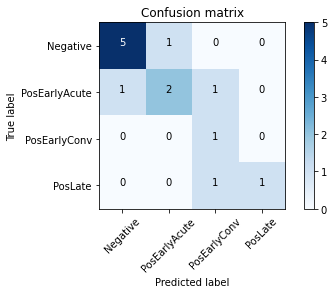

In [20]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','PosEarlyAcute','PosEarlyConv','PosLate'],normalize= False,  title='Confusion matrix')

In [21]:
#note, it is not unusual to get warning messages based on some of the specific test/train split groupings
from sklearn import metrics 
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0
count = 100
classes=['Negative','PosEarlyAcute','PosEarlyConv','PosLate']
new_model = RandomForestClassifier(n_estimators=desired_estimators)
for n in range(1, count+1):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, stratify=y)       
    new_model.fit(X_tr, y_tr)
    yh = new_model.predict(X_te)
    cr = classification_report(y_te, yh, output_dict=True)
    cnf_matrix = confusion_matrix(y_te, yh)
    
    
    curr_accuracy = metrics.accuracy_score(y_te,yh)
    #the code below derives TP/FP/TN/FN values from the multiclass confusion matrix by ignoring 
    #misclassification of positive subclasses   
    curr_false_pos = cnf_matrix.sum(axis=1)[0]-cnf_matrix[0][0]
    curr_false_neg = cnf_matrix.sum(axis=0)[0]-cnf_matrix[0][0]
    curr_true_neg = cnf_matrix[0][0]
    curr_true_pos = cnf_matrix.sum()-(curr_false_pos+curr_false_neg+curr_true_neg)    
        
    curr_sensitivity = curr_true_pos/(curr_true_pos+curr_false_neg)
    
    curr_specificity = cr["Neg"]["recall"]
    print("Run: %d" % (n))
    print(' Accuracy: %.3f ' % (curr_accuracy))
    print(' Sensitivity: %.3f ' % (curr_sensitivity))
    print(' Specificity: %.3f ' % (curr_specificity))
    
    #rows = y_te.index
    #format_probabilities(yps , classes, rows)
    
    sensitivity_sum = sensitivity_sum + curr_sensitivity
    specificity_sum = specificity_sum + curr_specificity
    accuracy_sum = accuracy_sum + curr_accuracy
    

average_accuracy = accuracy_sum/count
average_sensitivity = sensitivity_sum/count
average_specificity = specificity_sum/count
print('')
print('Average Results:')
print('Average Accuracy: %.3f ' % (average_accuracy))
print('Average Sensitivity: %.3f ' % (average_sensitivity))
print('Average Specificity: %.3f ' % (average_specificity))

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 1
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 2
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 3
 Accuracy: 0.750 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 4
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 5
 Accuracy: 0.562 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 6
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 7
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 8
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 0.750 
Run: 9
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 10
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 11
 Accuracy: 0.500 
 Sensitivity: 0.500 
 Specificity: 0.875 
Run: 12
 Accuracy: 0.562 
 Sensitivity: 0.625 
 Specificity: 0.875 
Run: 13
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 14
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 15
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 16
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 17
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 18
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 19
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Speci

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 21
 Accuracy: 0.625 
 Sensitivity: 0.333 
 Specificity: 1.000 
Run: 22
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 23
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 24
 Accuracy: 0.562 
 Sensitivity: 0.444 
 Specificity: 1.000 
Run: 25
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 0.857 
Run: 26
 Accuracy: 0.812 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 27
 Accuracy: 0.625 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 28
 Accuracy: 0.625 
 Sensitivity: 0.500 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 29
 Accuracy: 0.562 
 Sensitivity: 0.375 
 Specificity: 0.875 
Run: 30
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 0.750 
Run: 31
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 32
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 33
 Accuracy: 0.625 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 34
 Accuracy: 0.625 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 35
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 36
 Accuracy: 0.625 
 Sensitivity: 0.556 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 37
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 38
 Accuracy: 0.812 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 39
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 40
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 0.875 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 41
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 42
 Accuracy: 0.875 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 43
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 44
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 45
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 46
 Accuracy: 0.750 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 47
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 48
 Accuracy: 0.625 
 Sensitivity: 0.556 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 49
 Accuracy: 0.688 
 Sensitivity: 0.556 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 50
 Accuracy: 0.688 
 Sensitivity: 0.375 
 Specificity: 1.000 
Run: 51
 Accuracy: 0.688 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 52
 Accuracy: 0.625 
 Sensitivity: 0.500 
 Specificity: 0.750 
Run: 53
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 54
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 55
 Accuracy: 0.812 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 56
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 57
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 58
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 59
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 60
 Accuracy: 0.562 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 61
 Accuracy: 0.562 
 Sensitivity: 0.625 
 Specificity: 0.625 
Run: 62
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 63
 Accuracy: 0.562 
 Sensitivity: 0.667 
 Specificity: 0.857 
Run: 64
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 65
 Accuracy: 0.625 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 66
 Accuracy: 0.625 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 67
 Accuracy: 0.625 
 Sensitivity: 0.667 
 Specificity: 0.857 
Run: 68
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 69
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 0.857 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 70
 Accuracy: 0.500 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 71
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 72
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 73
 Accuracy: 0.625 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 74
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 0.875 
Run: 75
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 76
 Accuracy: 0.625 
 Sensitivity: 0.625 
 Specificity: 0.750 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 77
 Accuracy: 0.688 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 78
 Accuracy: 0.625 
 Sensitivity: 0.667 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 79
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 80
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 81
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 82
 Accuracy: 0.875 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 83
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 84
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 85
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 86
 Accuracy: 0.875 
 Sensitivity: 0.889 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 87
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 88
 Accuracy: 0.625 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 89
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 90
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 91
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 92
 Accuracy: 0.750 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 93
 Accuracy: 0.625 
 Sensitivity: 0.667 
 Specificity: 0.857 
Run: 94
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 0.857 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 95
 Accuracy: 0.562 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 96
 Accuracy: 0.562 
 Sensitivity: 0.625 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 97
 Accuracy: 0.812 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 98
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 99
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 100
 Accuracy: 0.688 
 Sensitivity: 0.500 
 Specificity: 1.000 

Average Results:
Average Accuracy: 0.692 
Average Sensitivity: 0.708 
Average Specificity: 0.961 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


153